In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
import pandas as pd

# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/삼성전자.csv'
df = pd.read_csv(file_name)
print(df)

           Date     Open     High      Low    Close     Adj Close    Volume
0    2021-06-03  81300.0  83000.0  81100.0  82800.0  78860.312500  29546007
1    2021-06-04  82700.0  82700.0  81500.0  82200.0  78288.851562  18112259
2    2021-06-07  82700.0  82800.0  81600.0  81900.0  78003.117188  16496197
3    2021-06-08  82300.0  82600.0  81800.0  81900.0  78003.117188  12781226
4    2021-06-09  81500.0  82000.0  81100.0  81100.0  77241.187500  14908823
..          ...      ...      ...      ...      ...           ...       ...
240  2022-05-26  66300.0  67200.0  65500.0  65900.0  63956.929688  15970890
241  2022-05-27  66700.0  66900.0  66200.0  66500.0  64539.230469  11405555
242  2022-05-30  67500.0  67800.0  66900.0  67700.0  65703.851562  14255484
243  2022-05-31  67500.0  67500.0  66700.0  67400.0  65412.707031  24365002
244  2022-06-02  66600.0  67000.0  66400.0  66700.0  64733.339844  14959443

[245 rows x 7 columns]


In [12]:
df.shape

(245, 7)

In [13]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [15]:
dfx = df[['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Adj Close','Volume']]

dfx

,Open,High,Low,Adj Close,Volume
0,0.890110,0.983146,0.948571,0.972905,0.482221
1,0.967033,0.966292,0.971429,0.938093,0.295611
2,0.967033,0.971910,0.977143,0.920687,0.269235
3,0.945055,0.960674,0.988571,0.920687,0.208603
4,0.901099,0.926966,0.948571,0.874272,0.243327
...,...,...,...,...,...
240,0.065934,0.095506,0.057143,0.065033,0.260661
241,0.087912,0.078652,0.097143,0.100505,0.186150
242,0.131868,0.129213,0.137143,0.171451,0.232664
243,0.131868,0.112360,0.125714,0.153715,0.397662


In [16]:
dfx.describe()

,Open,High,Low,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.498946,0.513231,0.519650,0.508122,0.239820
std,0.265445,0.268757,0.272698,0.262232,0.109234
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280220,0.286517,0.302857,0.280265,0.187514
50%,0.505495,0.528090,0.531429,0.516314,0.222054
75%,0.730769,0.752809,0.742857,0.743588,0.274398
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
dfy.head()

,Close
0,0.994475
1,0.961326
2,0.944751
3,0.944751
4,0.900552


In [18]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [19]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(235, 10, 5)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((157, 10, 5), (78, 10, 5), (157, 1), (78, 1))

[ RNN ]

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [34]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.3),
    SimpleRNN(20, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10, 20)            520       
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mse', optimizer='adam')

In [44]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/400
4/4 [==============================] - 0s 23ms/step - loss: 0.0071 - val_loss: 0.0102
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 0.0086 - val_loss: 0.0103
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0128
Epoch 4/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0077 - val_loss: 0.0119
Epoch 5/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0062 - val_loss: 0.0100
Epoch 6/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0071 - val_loss: 0.0077
Epoch 7/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0070 - val_loss: 0.0095
Epoch 8/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0068 - val_loss: 0.0124
Epoch 9/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0131
Epoch 10/400
4/4 [==============================] - 0s 21ms/step - loss: 0.0075 - val_loss: 0.0109
Epoch 11/400
4/4 [=

Epoch 84/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 0.0108
Epoch 85/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0064 - val_loss: 0.0104
Epoch 86/400
4/4 [==============================] - 0s 22ms/step - loss: 0.0058 - val_loss: 0.0133
Epoch 87/400
4/4 [==============================] - 0s 17ms/step - loss: 0.0058 - val_loss: 0.0150
Epoch 88/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0078 - val_loss: 0.0114
Epoch 89/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0072 - val_loss: 0.0105
Epoch 90/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0078 - val_loss: 0.0120
Epoch 91/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0069 - val_loss: 0.0134
Epoch 92/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0067 - val_loss: 0.0125
Epoch 93/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0109
Epoch 94/4

4/4 [==============================] - 0s 14ms/step - loss: 0.0051 - val_loss: 0.0098
Epoch 167/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0059 - val_loss: 0.0110
Epoch 168/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0134
Epoch 169/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0130
Epoch 170/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0094
Epoch 171/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0064 - val_loss: 0.0113
Epoch 172/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0090 - val_loss: 0.0126
Epoch 173/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0143
Epoch 174/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0056 - val_loss: 0.0123
Epoch 175/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0115
Epoch 176/400


4/4 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.0121
Epoch 249/400
4/4 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0120
Epoch 250/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0131
Epoch 251/400
4/4 [==============================] - 0s 15ms/step - loss: 0.0059 - val_loss: 0.0135
Epoch 252/400
4/4 [==============================] - 0s 14ms/step - loss: 0.0053 - val_loss: 0.0122
Epoch 253/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0109
Epoch 254/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0055 - val_loss: 0.0126
Epoch 255/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0141
Epoch 256/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0117
Epoch 257/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0064 - val_loss: 0.0112
Epoch 258/400


4/4 [==============================] - 0s 13ms/step - loss: 0.0073 - val_loss: 0.0110
Epoch 331/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0132
Epoch 332/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0154
Epoch 333/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0046 - val_loss: 0.0132
Epoch 334/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0111
Epoch 335/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0135
Epoch 336/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0147
Epoch 337/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0047 - val_loss: 0.0124
Epoch 338/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0044 - val_loss: 0.0121
Epoch 339/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0062 - val_loss: 0.0124
Epoch 340/400


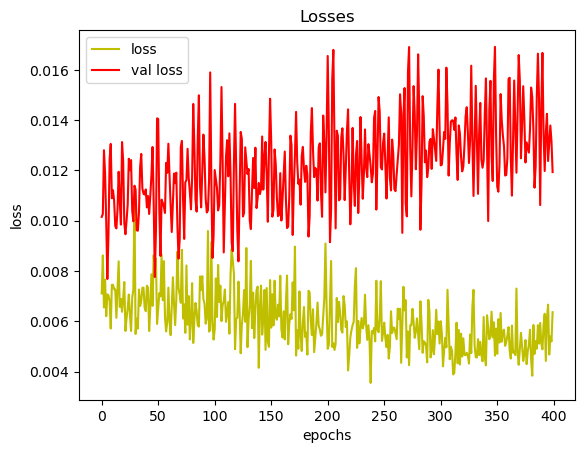

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


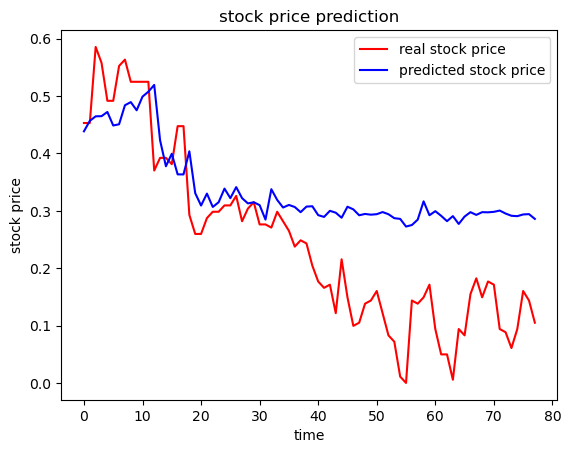

In [47]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()


[ CNN ] 

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

# 모델 정의
model = Sequential()

# Conv1D 레이어 추가
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))

# Flatten 레이어를 추가하여 1D 데이터를 1D 배열로 변환
model.add(Flatten())

# Fully Connected 레이어 추가
model.add(Dense(1, activation='linear'))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')  # 회귀 문제이므로 MSE 사용

# 모델 요약
model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 7, 64)             1344      
                                                                 
 conv1d_32 (Conv1D)          (None, 4, 128)            32896     
                                                                 
 conv1d_33 (Conv1D)          (None, 1, 64)             32832     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 67,137
Trainable params: 67,137
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# fit network
train_epochs = 500
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=32, verbose=True,  validation_split=0.2, shuffle=True)

Epoch 1/500
4/4 [==============================] - 1s 55ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 13ms/step 

4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 54/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 55/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 56/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 57/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 58/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 59/500
4/4 [==============================] - 0s 11ms/step - loss

4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 106/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 107/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 108/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 109/500
4/4 [==============================] - 0s 10ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 110/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 111/500
4/4 [==============================] - 0s 11ms/step 

Epoch 157/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 158/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 159/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 160/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 161/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 162/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 163/500
4/4 [==============================] -

Epoch 209/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 210/500
4/4 [==============================] - 0s 14ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 211/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 212/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 213/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 214/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 215/500
4/4 [==============================] -

Epoch 261/500
4/4 [==============================] - 0s 14ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 262/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 263/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 264/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 265/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 266/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 267/500
4/4 [==============================] -

Epoch 313/500
4/4 [==============================] - 0s 14ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 314/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 315/500
4/4 [==============================] - 0s 15ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 316/500
4/4 [==============================] - 0s 17ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 317/500
4/4 [==============================] - 0s 17ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 318/500
4/4 [==============================] - 0s 20ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 319/500
4/4 [==============================] -

Epoch 365/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 366/500
4/4 [==============================] - 0s 13ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 367/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 368/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 369/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 370/500
4/4 [==============================] - 0s 12ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 371/500
4/4 [==============================] -

Epoch 417/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 418/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 419/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 420/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 421/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 422/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 423/500
4/4 [==============================] -

Epoch 469/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 470/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 471/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 472/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 473/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 474/500
4/4 [==============================] - 0s 11ms/step - loss: 7.1736e-08 - accuracy: 0.0000e+00 - val_loss: 8.0310e-08 - val_accuracy: 0.0000e+00
Epoch 475/500
4/4 [==============================] -

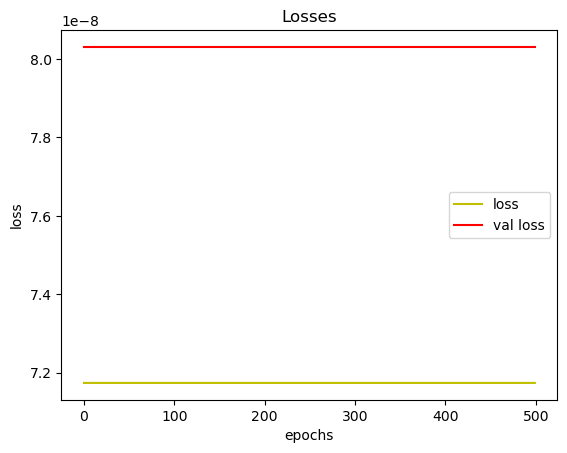

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [86]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


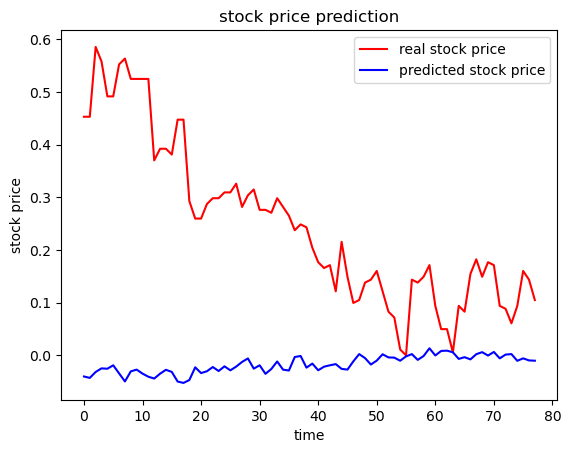

In [87]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()